In [34]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("Data/eth_clean_2.csv")
print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (2071, 10)


,Date,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,1.822470e+13,1.041462,11937.3
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,1.822470e+13,1.041462,11925.9
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,1.822470e+13,1.041462,11929.2
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,1.822470e+13,1.041462,11943.1
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,1.822470e+13,1.041462,11955.2


In [35]:
training_set = df.iloc[:1600, 1:2].values
test_set = df.iloc[1600:, 1:2].values
test_set.shape


(471, 1)

In [36]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1600):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [37]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
49/49 [==============================] - 7s 56ms/step - loss: 0.0196

In [38]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1600, 1:2]
dataset_test = df.iloc[1600:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,  472):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (1535, 60, 1)

(412, 60, 1)


In [39]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

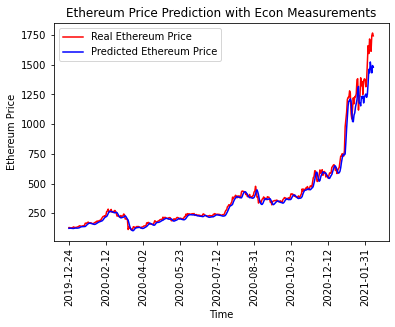

In [42]:
predicted = []
for i in predicted_stock_price:
    predicted.append(i[0])# Visualising the results
plt.plot(df.loc[1600:2011, 'Date'],dataset_test.values[0:412], color = 'red', label = 'Real Ethereum Price')
plt.plot(df.loc[1600:2011, 'Date'],predicted, color = 'blue', label = 'Predicted Ethereum Price')
plt.xticks(np.arange(0,412,50))
plt.xticks(rotation='vertical')
plt.title('Ethereum Price Prediction with Econ Measurements')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

In [41]:
df.loc[2000:2334, 'Date'][0:6]


2000    2021-01-31
2001    2021-02-01
2002    2021-02-02
2003    2021-02-03
2004    2021-02-04
2005    2021-02-05
Name: Date, dtype: object